In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import os
os.environ['TORCH_HOME'] = "/media/hdd/Datasets/"
import sys
sys.path.append("/media/hdd/github/sprintdl/")

In [48]:
from sprintdl.main import *
import sprintdl

In [3]:
device = torch.device('cuda',0)
from torch.nn import init
import torch
import math

In [4]:
from sprintdl.models.xresnet import *

# Define required

In [5]:
fpath = Path("/media/hdd/Datasets/faceKeypoint/")

train_transform = [
#                    A.SmallestMaxSize(max_size=160),
#         A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
#         A.RandomCrop(height=128, width=128),
        
#         A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
        A.RandomBrightnessContrast(p=0.5),
    ]

tfms = [ATransform(train_transform, c_in = 2)]
bs = 128

# Actual process

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv(fpath/'training.csv')

In [8]:
df.head(2)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...


In [9]:
def get_locs(flname):
    index = int(flname.name[:-4])
    plist=[]
    coords=list(df.loc[index])
    for i in range(len(coords)//2):
        plist.append([coords[i*2+1],coords[i*2]])
    return tensor(plist)

In [10]:
get_locs(Path("/media/hdd/Datasets/faceKeypoint/trainImages/2246.jpg"))

tensor([[37.4975, 65.4759],
        [37.9938, 30.4601],
        [38.4653, 58.0807],
        [39.1353, 72.8687],
        [38.9616, 38.0787],
        [39.6525, 22.3000],
        [29.2928, 56.5432],
        [30.6152, 78.5232],
        [29.3534, 38.5824],
        [31.8727, 14.7483],
        [58.4229, 48.0418],
        [78.6050, 61.7846],
        [78.8908, 33.0484],
        [77.4177, 47.4275],
        [78.8029, 47.6694]], dtype=torch.float64)

In [11]:
il = ImageList.from_files(fpath, tfms=tfms)

In [12]:
il

ImageList (7049 items)
[PosixPath('/media/hdd/Datasets/faceKeypoint/trainImages/2246.jpg'), PosixPath('/media/hdd/Datasets/faceKeypoint/trainImages/5325.jpg'), PosixPath('/media/hdd/Datasets/faceKeypoint/trainImages/4065.jpg'), PosixPath('/media/hdd/Datasets/faceKeypoint/trainImages/3146.jpg'), PosixPath('/media/hdd/Datasets/faceKeypoint/trainImages/2232.jpg'), PosixPath('/media/hdd/Datasets/faceKeypoint/trainImages/2555.jpg'), PosixPath('/media/hdd/Datasets/faceKeypoint/trainImages/3791.jpg'), PosixPath('/media/hdd/Datasets/faceKeypoint/trainImages/4444.jpg'), PosixPath('/media/hdd/Datasets/faceKeypoint/trainImages/5419.jpg'), PosixPath('/media/hdd/Datasets/faceKeypoint/trainImages/2549.jpg')...]
Path: /media/hdd/Datasets/faceKeypoint

In [13]:
sd = SplitData.split_by_func(il, partial(random_splitter, p_valid = .2))
ll = label_by_func(sd, get_locs)

In [14]:
n_classes = 15

In [15]:
n_classes

15

In [16]:
data = ll.to_databunch(bs, c_in=3, c_out=n_classes)

In [17]:
data.train_ds.y.items[0]

tensor([[37.4975, 65.4759],
        [37.9938, 30.4601],
        [38.4653, 58.0807],
        [39.1353, 72.8687],
        [38.9616, 38.0787],
        [39.6525, 22.3000],
        [29.2928, 56.5432],
        [30.6152, 78.5232],
        [29.3534, 38.5824],
        [31.8727, 14.7483],
        [58.4229, 48.0418],
        [78.6050, 61.7846],
        [78.8908, 33.0484],
        [77.4177, 47.4275],
        [78.8029, 47.6694]], dtype=torch.float64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be 

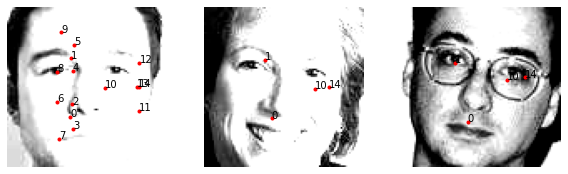

In [57]:
plot_keypoints([x.permute(1,2,0) for x in data.train_ds.x[:3]], data.train_ds.y[:3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


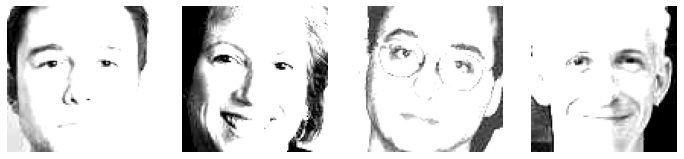

In [27]:
show_batch(data, 4)

# Training

In [28]:
def mseloss(input, target):
    target = target.view(target.size(0),-1)
    target[torch.isnan(target)] = 0
    return nn.MSELoss()(input, target.type(torch.FloatTensor).cuda())

In [29]:
lr = .001
pct_start = 0.5
phases = create_phases(pct_start)
sched_lr  = combine_scheds(phases, cos_1cycle_anneal(lr/10., lr, lr/1e5))
sched_mom = combine_scheds(phases, cos_1cycle_anneal(0.95, 0.85, 0.95))

cbfs = [
    partial(AvgStatsCallback,[mseloss]),
    partial(ParamScheduler, 'lr', sched_lr),
    partial(ParamScheduler, 'mom', sched_mom),
        partial(BatchTransformXCallback, norm_imagenette),
    ProgressCallback,
    Recorder,
#     MixUp,
       partial(CudaCallback, device)]
opt_func = adam_opt(mom=0.9, mom_sqr=0.99, eps=1e-6, wd=1e-2)

In [30]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
        self.fc1 = nn.Linear(128, 30) 
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout2d(p=0.2)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        bs, _, _, _ = x.shape
        x = F.adaptive_avg_pool2d(x, 1).reshape(bs, -1)
        x = self.dropout(x)
        out = self.fc1(x) 
        return out

In [31]:
arch= Net()

In [32]:
count_parameters(arch)

Total Trainable Params: 98654


98654

In [33]:
learn = None
clear_memory()

In [34]:
lr = .0001

In [35]:
learn = Learner(arch, data,mseloss, lr=lr, cb_funcs=cbfs, opt_func=opt_func)

In [36]:
learn.fit(1)

epoch,train_loss,train_mseloss,valid_loss,valid_mseloss,time
0,893.143594,893.143616,511.587255,511.587280,00:02


In [50]:
learn.fit(20)

epoch,train_loss,train_mseloss,valid_loss,valid_mseloss,time
0,528.652180,528.652161,494.496064,494.496063,00:02
1,518.877847,518.877869,487.253455,487.253479,00:02
2,513.576601,513.576599,481.620626,481.620636,00:02
3,496.661210,496.661224,470.823609,470.823608,00:02
4,476.653870,476.653870,453.366865,453.366882,00:02
5,470.407829,470.407837,460.514433,460.514435,00:02
6,454.945240,454.945251,438.784159,438.784180,00:02
7,447.832607,447.832611,422.353831,422.353851,00:03
8,429.784786,429.784790,410.972621,410.972626,00:03
9,420.065792,420.065796,402.435269,402.435272,00:03


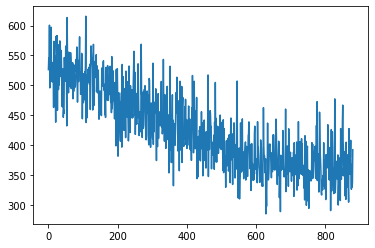

In [51]:
learn.recorder.plot_loss()

In [52]:
save_model(learn, "pointsTry",Path("/media/hdd/Datasets/faceKeypoint/"))

Saved at /media/hdd/Datasets/faceKeypoint/models/pointsTry


PosixPath('/media/hdd/Datasets/faceKeypoint/models/pointsTry')

In [55]:
pred= predict_image(learn, "/media/hdd/Datasets/faceKeypoint/trainImages/2246.jpg")

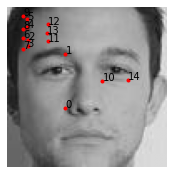

In [56]:
plot_keypoints([sprintdl.aug.open_image("/media/hdd/Datasets/faceKeypoint/trainImages/2246.jpg", to_tensor=True, perm =(1,2,0) )], [pred])